In [2]:
import altair as alt
import pandas as pd

data = pd.DataFrame([dict(id=i) for i in range(1, 101)])

person = (
    "M1.7 -1.7h-0.8c0.3 -0.2 0.6 -0.5 0.6 -0.9c0 -0.6 "
    "-0.4 -1 -1 -1c-0.6 0 -1 0.4 -1 1c0 0.4 0.2 0.7 0.6 "
    "0.9h-0.8c-0.4 0 -0.7 0.3 -0.7 0.6v1.9c0 0.3 0.3 0.6 "
    "0.6 0.6h0.2c0 0 0 0.1 0 0.1v1.9c0 0.3 0.2 0.6 0.3 "
    "0.6h1.3c0.2 0 0.3 -0.3 0.3 -0.6v-1.8c0 0 0 -0.1 0 "
    "-0.1h0.2c0.3 0 0.6 -0.3 0.6 -0.6v-2c0.2 -0.3 -0.1 "
    "-0.6 -0.4 -0.6z"
)

alt.Chart(data).transform_calculate(
    row="ceil(datum.id/10)"
).transform_calculate(
    col="datum.id - datum.row*10"
).mark_point(
    filled=True,
    size=50
).encode(
    x=alt.X("col:O", axis=None),
    y=alt.Y("row:O", axis=None),
    shape=alt.ShapeValue(person)
).properties(
    width=400,
    height=400
).configure_view(
    strokeWidth=0
)

alt.Chart(...)

In [5]:
import altair as alt
import pandas as pd
import numpy as np

# 1. The "Human" Geometry (SVG Path)
person_icon = (
    "M1.7 -1.7h-0.8c0.3 -0.2 0.6 -0.5 0.6 -0.9c0 -0.6 "
    "-0.4 -1 -1 -1c-0.6 0 -1 0.4 -1 1c0 0.4 0.2 0.7 0.6 "
    "0.9h-0.8c-0.4 0 -0.7 0.3 -0.7 0.6v1.9c0 0.3 0.3 0.6 "
    "0.6 0.6h0.2c0 0 0 0.1 0 0.1v1.9c0 0.3 0.2 0.6 0.3 "
    "0.6h1.3c0.2 0 0.3 -0.3 0.3 -0.6v-1.8c0 0 0 -0.1 0 "
    "-0.1h0.2c0.3 0 0.6 -0.3 0.6 -0.6v-2c0.2 -0.3 -0.1 "
    "-0.6 -0.4 -0.6z"
)

# 2. Generate "ML Result" Data (100 People)
np.random.seed(42)
N = 100
data = pd.DataFrame({'id': range(N)})

conditions = [
    (data['id'] < 70),
    (data['id'] >= 70) & (data['id'] < 85),
    (data['id'] >= 85) & (data['id'] < 95),
    (data['id'] >= 95)
]
choices = ['Safe (True Neg)', 'Fraud Caught (True Pos)', 'False Alarm (False Pos)', 'Fraud Missed (False Neg)']

# FIX: Added default='Unknown' to prevent int/str type clash
data['status'] = np.select(conditions, choices, default='Unknown')

# Pre-calculate Grid positions
data['col'] = data['id'] % 10
data['row'] = data['id'] // 10

# 3. Build the Visualization
selection = alt.selection_point(fields=['status'], bind='legend')

base = alt.Chart(data).encode(
    x=alt.X('col:O', axis=None),
    y=alt.Y('row:O', axis=None, sort='descending')
).properties(
    title=dict(
        text="The Human Impact of Algorithmic Bias",
        subtitle=["Visualizing Model Performance on 100 Users.", "Click the Legend to isolate groups."],
        fontSize=16,
        subtitleFontSize=12
    ),
    width=500,
    height=500
)

points = base.mark_point(
    filled=True,
    size=100,
    opacity=1
).encode(
    shape=alt.ShapeValue(person_icon),
    color=alt.Color(
        'status:N', 
        scale=alt.Scale(
            domain=['Safe (True Neg)', 'Fraud Caught (True Pos)', 'False Alarm (False Pos)', 'Fraud Missed (False Neg)'],
            range=['#E0E0E0', '#2E86AB', '#D90429', '#EF233C']
        ),
        legend=alt.Legend(title="Model Decision", orient="right")
    ),
    opacity=alt.condition(selection, alt.value(1), alt.value(0.1)),
    tooltip=['status', 'id']
).add_params(
    selection
)

points.configure_view(
    strokeWidth=0
).configure_title(
    anchor='start',
    offset=20
)

alt.Chart(...)

In [7]:
import altair as alt
import pandas as pd
import numpy as np

# --- 1. The Geometry (Person Icon) ---
person_icon = (
    "M1.7 -1.7h-0.8c0.3 -0.2 0.6 -0.5 0.6 -0.9c0 -0.6 "
    "-0.4 -1 -1 -1c-0.6 0 -1 0.4 -1 1c0 0.4 0.2 0.7 0.6 "
    "0.9h-0.8c-0.4 0 -0.7 0.3 -0.7 0.6v1.9c0 0.3 0.3 0.6 "
    "0.6 0.6h0.2c0 0 0 0.1 0 0.1v1.9c0 0.3 0.2 0.6 0.3 "
    "0.6h1.3c0.2 0 0.3 -0.3 0.3 -0.6v-1.8c0 0 0 -0.1 0 "
    "-0.1h0.2c0.3 0 0.6 -0.3 0.6 -0.6v-2c0.2 -0.3 -0.1 "
    "-0.6 -0.4 -0.6z"
)

# --- 2. The Data Simulation (Economics) ---
np.random.seed(99)
N = 100
data = pd.DataFrame({'id': range(N)})

# Simulate "Willingness To Pay" (WTP)
# We use a normal distribution to create a realistic "S" curve demand
data['wtp'] = np.random.normal(loc=50, scale=15, size=N).astype(int)
data = data.sort_values('wtp', ascending=False).reset_index(drop=True)

# Create Segments based on WTP (Price Elasticity Zones)
# High WTP = Inelastic (Will pay anything) -> Gold
# Mid WTP = Elastic (Sensitive) -> Cyan
# Low WTP = Highly Elastic (Cheap) -> Magenta
conditions = [
    (data['wtp'] > 60),
    (data['wtp'] <= 60) & (data['wtp'] > 40),
    (data['wtp'] <= 40)
]
choices = ['1. Inelastic (Loyalists)', '2. Elastic (Swing Market)', '3. Price Sensitive (Risk)']
colors = ['#FFD700', '#00F5FF', '#FF007F'] # Gold, Neon Cyan, Neon Magenta

data['segment'] = np.select(conditions, choices, default='Unknown')

# Grid Logic (Sorted by WTP so colors flow visually)
data['row'] = data.index // 10
data['col'] = data.index % 10

# --- 3. The Visualization ---

# A. The Selector (Interaction)
selection = alt.selection_point(fields=['segment'], bind='legend')

# B. LEFT PLOT: The Demand Manifold (The "Super Vis")
# We visualize the cumulative demand as a glowing area
demand_curve = alt.Chart(data).mark_area(
    interpolate='monotone',
    fillOpacity=0.6,
    line={'color':'white'}
).encode(
    x=alt.X('id:Q', title='Market Volume (Cumulative)', axis=alt.Axis(labels=False, grid=False)),
    y=alt.Y('wtp:Q', title='Willingness to Pay ($)', scale=alt.Scale(domain=[0, 100])),
    color=alt.Color('segment:N', scale=alt.Scale(range=colors), legend=None),
    tooltip=['segment', 'wtp']
).properties(
    width=300,
    height=400,
    title="The Demand Manifold"
).add_params(
    selection
).transform_filter(
    selection
)

# Add a "Price Floor" line to make it look technical
# (Shows the theoretical market clearing price)
rule = alt.Chart(pd.DataFrame({'y': [50]})).mark_rule(
    color='white', strokeDash=[4, 4], size=2
).encode(y='y')

left_chart = (demand_curve + rule)

# C. RIGHT PLOT: The Human Grid (ISOTYPE)
# Sorted by WTP to match the flow of the left chart
people_grid = alt.Chart(data).mark_point(
    filled=True,
    size=100, # User requested size
    opacity=1
).encode(
    x=alt.X('col:O', axis=None),
    y=alt.Y('row:O', axis=None), # No sort needed as data is pre-sorted
    shape=alt.ShapeValue(person_icon),
    color=alt.Color('segment:N', 
                    scale=alt.Scale(domain=choices, range=colors),
                    legend=alt.Legend(title="Elasticity Zone", orient="bottom", titleFontSize=12)),
    tooltip=['id', 'wtp', 'segment'],
    opacity=alt.condition(selection, alt.value(1), alt.value(0.1))
).properties(
    width=400,
    height=400,
    title="The Consumer Population"
).add_params(
    selection
)

# --- 4. Composition ---
dashboard = alt.hconcat(
    left_chart, 
    people_grid
).resolve_scale(
    color='shared'
).configure_view(
    strokeWidth=0
).configure(
    background='#1e1e1e', # Dark Mode Background
    title={'color': 'white', 'fontSize': 18},
    legend={'labelColor': 'white', 'titleColor': 'white'},
    axis={'labelColor': 'white', 'titleColor': 'white', 'gridColor': '#333'}
)

dashboard

/Users/pstaif/Downloads/MyApps/econ_visual/venv/lib/python3.13/site-packages/IPython/core/interactiveshell.py:3699: UserWarning: Automatically deduplicated selection parameter with identical configuration. If you want independent parameters, explicitly name them differently (e.g., name='param1', name='param2'). See https://github.com/vega/altair/issues/3891
  exec(code_obj, self.user_global_ns, self.user_ns)


alt.HConcatChart(...)

In [11]:
import altair as alt
import pandas as pd
import numpy as np

# --- 1. The Geometry (The "Ghost" capable icon) ---
person_icon = (
    "M1.7 -1.7h-0.8c0.3 -0.2 0.6 -0.5 0.6 -0.9c0 -0.6 "
    "-0.4 -1 -1 -1c-0.6 0 -1 0.4 -1 1c0 0.4 0.2 0.7 0.6 "
    "0.9h-0.8c-0.4 0 -0.7 0.3 -0.7 0.6v1.9c0 0.3 0.3 0.6 "
    "0.6 0.6h0.2c0 0 0 0.1 0 0.1v1.9c0 0.3 0.2 0.6 0.3 "
    "0.6h1.3c0.2 0 0.3 -0.3 0.3 -0.6v-1.8c0 0 0 -0.1 0 "
    "-0.1h0.2c0.3 0 0.6 -0.3 0.6 -0.6v-2c0.2 -0.3 -0.1 "
    "-0.6 -0.4 -0.6z"
)

# --- 2. Data Simulation ---
np.random.seed(42)
N = 100

# Market A: Necessity (Inelastic)
df_inelastic = pd.DataFrame({'id': range(N)})
df_inelastic['market'] = 'Market A: Necessity (Inelastic)'
df_inelastic['wtp'] = np.random.normal(loc=80, scale=10, size=N).astype(int)

# Market B: Luxury (Elastic)
df_elastic = pd.DataFrame({'id': range(N)})
df_elastic['market'] = 'Market B: Luxury (Elastic)'
df_elastic['wtp'] = np.random.normal(loc=40, scale=15, size=N).astype(int)

data = pd.concat([df_inelastic, df_elastic])
data['col'] = data.groupby('market').cumcount() % 10
data['row'] = data.groupby('market').cumcount() // 10

# --- 3. The Interactive Logic (FIXED) ---
# We give the param a specific internal 'name' ("price_cutoff")
# This allows us to refer to it in the condition string below.
price_slider = alt.param(
    value=30,
    bind=alt.binding_range(min=0, max=100, step=5, name='Current Price ($) '),
    name='price_cutoff' 
)

# --- 4. The Visualization ---
base = alt.Chart(data).encode(
    x=alt.X('col:O', axis=None),
    y=alt.Y('row:O', axis=None, sort='descending')
).properties(
    width=300,
    height=300
)

chart = base.mark_point(
    filled=True,
    size=50
).encode(
    shape=alt.ShapeValue(person_icon),
    
    # Use the parameter name 'price_cutoff' directly in the string
    color=alt.condition(
        "datum.wtp >= price_cutoff", 
        alt.Color('market:N', scale=alt.Scale(range=['#00FF00', '#00BFFF']), legend=None),
        alt.value('#333333') # Ghost color
    ),
    
    opacity=alt.condition(
        "datum.wtp >= price_cutoff",
        alt.value(1),
        alt.value(0.2)
    ),
    
    tooltip=['wtp', 'market']
).add_params(
    price_slider
).facet(
    column=alt.Column('market:N', title=None, header=alt.Header(
        labelColor='white', 
        labelFontSize=20, 
        labelFontWeight='bold'
    ))
).resolve_scale(
    color='independent'
)

# --- 5. Cyberpunk Styling ---
chart.configure(
    background='#111111',
    view=dict(strokeWidth=0)
).configure_title(
    color='white'
)

alt.FacetChart(...)

In [20]:
import altair as alt
import pandas as pd
import numpy as np

# --- 1. The Geometry ---
person_icon = (
    "M1.7 -1.7h-0.8c0.3 -0.2 0.6 -0.5 0.6 -0.9c0 -0.6 "
    "-0.4 -1 -1 -1c-0.6 0 -1 0.4 -1 1c0 0.4 0.2 0.7 0.6 "
    "0.9h-0.8c-0.4 0 -0.7 0.3 -0.7 0.6v1.9c0 0.3 0.3 0.6 "
    "0.6 0.6h0.2c0 0 0 0.1 0 0.1v1.9c0 0.3 0.2 0.6 0.3 "
    "0.6h1.3c0.2 0 0.3 -0.3 0.3 -0.6v-1.8c0 0 0 -0.1 0 "
    "-0.1h0.2c0.3 0 0.6 -0.3 0.6 -0.6v-2c0.2 -0.3 -0.1 "
    "-0.6 -0.4 -0.6z"
)

# --- 2. Data Generation ---
np.random.seed(42)
N = 100

df_a = pd.DataFrame({"id": range(N)})
df_a["market"] = "A: Inelastic (Medicine)"
df_a["wtp"] = np.random.normal(loc=80, scale=10, size=N).astype(int)

df_b = pd.DataFrame({"id": range(N)})
df_b["market"] = "B: Elastic (Cinema)"
df_b["wtp"] = np.random.normal(loc=40, scale=15, size=N).astype(int)

# Keep WTP non-negative
df_a["wtp"] = np.clip(df_a["wtp"], 0, None)
df_b["wtp"] = np.clip(df_b["wtp"], 0, None)

# Combine for People Plots
people_data = pd.concat([df_a, df_b], ignore_index=True)
people_data["col"] = people_data.groupby("market").cumcount() % 10
people_data["row"] = people_data.groupby("market").cumcount() // 10

# --- 2b. Auto-consistent price range ---
p_max = int(np.ceil(people_data["wtp"].max() / 5) * 5)
p_max = min(p_max, 120)

# --- 2c. Curve data: for each price p, quantity = count(WTP >= p) ---
curve_rows = []
for m_name, df_subset in [
    ("A: Inelastic (Medicine)", df_a),
    ("B: Elastic (Cinema)", df_b),
]:
    for p in range(0, p_max + 1):
        q = int((df_subset["wtp"] >= p).sum())
        curve_rows.append({"market": m_name, "price": p, "quantity": q})

curve_data = pd.DataFrame(curve_rows)

# --- 3. Slider ---
price_slider = alt.param(
    value=min(30, p_max),
    bind=alt.binding_range(min=0, max=p_max, step=1, name="Set Market Price ($) "),
    name="price_cutoff",
)

# --- 4. Top Row: Demand Curves (x=price, y=quantity) ---

# Vertical "laser" price line
price_rule = (
    alt.Chart(pd.DataFrame({"dummy": [1]}))
    .transform_calculate(price="price_cutoff")
    .mark_rule(color="white", strokeWidth=2, strokeDash=[4, 4])
    .encode(x=alt.X("price:Q"))
)

def snap_layer(market_contains: str):
    # Dot + label at the slider price showing quantity demanded
    base = alt.Chart(curve_data[curve_data["market"].str.contains(market_contains)])
    snap = base.transform_filter("datum.price == price_cutoff")

    dot = snap.mark_point(size=80).encode(
        x="price:Q",
        y="quantity:Q",
    )

    label = snap.mark_text(dx=8, dy=-8, align="left").encode(
        x="price:Q",
        y="quantity:Q",
        text=alt.Text("quantity:Q", format=".0f"),
    )

    return dot + label

# Market A
line_a = (
    alt.Chart(curve_data[curve_data["market"].str.contains("A")])
    .mark_area(interpolate="step-after", fillOpacity=0.3, line=True, color="#00FF00")
    .encode(
        x=alt.X("price:Q", title="Price ($)", scale=alt.Scale(domain=[0, p_max])),
        y=alt.Y("quantity:Q", title="Quantity Demanded", scale=alt.Scale(domain=[0, N])),
    )
    .properties(title="Demand Curve A", height=200, width=250)
)

# Market B
line_b = (
    alt.Chart(curve_data[curve_data["market"].str.contains("B")])
    .mark_area(interpolate="step-after", fillOpacity=0.3, line=True, color="#00BFFF")
    .encode(
        x=alt.X("price:Q", title="Price ($)", scale=alt.Scale(domain=[0, p_max])),
        y=alt.Y("quantity:Q", title=None, scale=alt.Scale(domain=[0, N])),
    )
    .properties(title="Demand Curve B", height=200, width=250)
)

top_row = (line_a + price_rule + snap_layer("A")) | (line_b + price_rule + snap_layer("B"))

# --- 5. Bottom Row: The People (Micro) ---
ICON_SIZE = 160  # smaller icons
PAD_INNER = 0.6  # space between grid cells
PAD_OUTER = 0.25

base_people = alt.Chart(people_data).encode(
    x=alt.X("col:O", axis=None, scale=alt.Scale(paddingInner=PAD_INNER, paddingOuter=PAD_OUTER)),
    y=alt.Y("row:O", axis=None, sort="descending",
            scale=alt.Scale(paddingInner=PAD_INNER, paddingOuter=PAD_OUTER)),
).properties(
    width=260,
    height=260
)

people_a = (
    base_people.transform_filter(alt.datum.market == "A: Inelastic (Medicine)")
    .mark_point(filled=True, size=ICON_SIZE)
    .encode(
        shape=alt.ShapeValue(person_icon),
        color=alt.condition("datum.wtp >= price_cutoff", alt.value("#00FF00"), alt.value("#333")),
        opacity=alt.condition("datum.wtp >= price_cutoff", alt.value(1), alt.value(0.2)),
        tooltip=["wtp"],
    )
    .properties(title="Market A Population")
)

people_b = (
    base_people.transform_filter(alt.datum.market == "B: Elastic (Cinema)")
    .mark_point(filled=True, size=ICON_SIZE)
    .encode(
        shape=alt.ShapeValue(person_icon),
        color=alt.condition("datum.wtp >= price_cutoff", alt.value("#00BFFF"), alt.value("#333")),
        opacity=alt.condition("datum.wtp >= price_cutoff", alt.value(1), alt.value(0.2)),
        tooltip=["wtp"],
    )
    .properties(title="Market B Population")
)

bottom_row = people_a | people_b

# --- 6. Composition ---
dashboard = (
    alt.vconcat(top_row, bottom_row)
    .add_params(price_slider)
    .configure(background="#111111", view=dict(strokeWidth=0))
    .configure_axis(labelColor="white", titleColor="white", gridColor="#333")
    .configure_title(color="white", fontSize=16, anchor="start")
)

dashboard

alt.VConcatChart(...)

/var/folders/ss/l5wyf1v92rl0qj7z7zx8zzhw0000gn/T/ipykernel_80051/1127366658.py:39: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


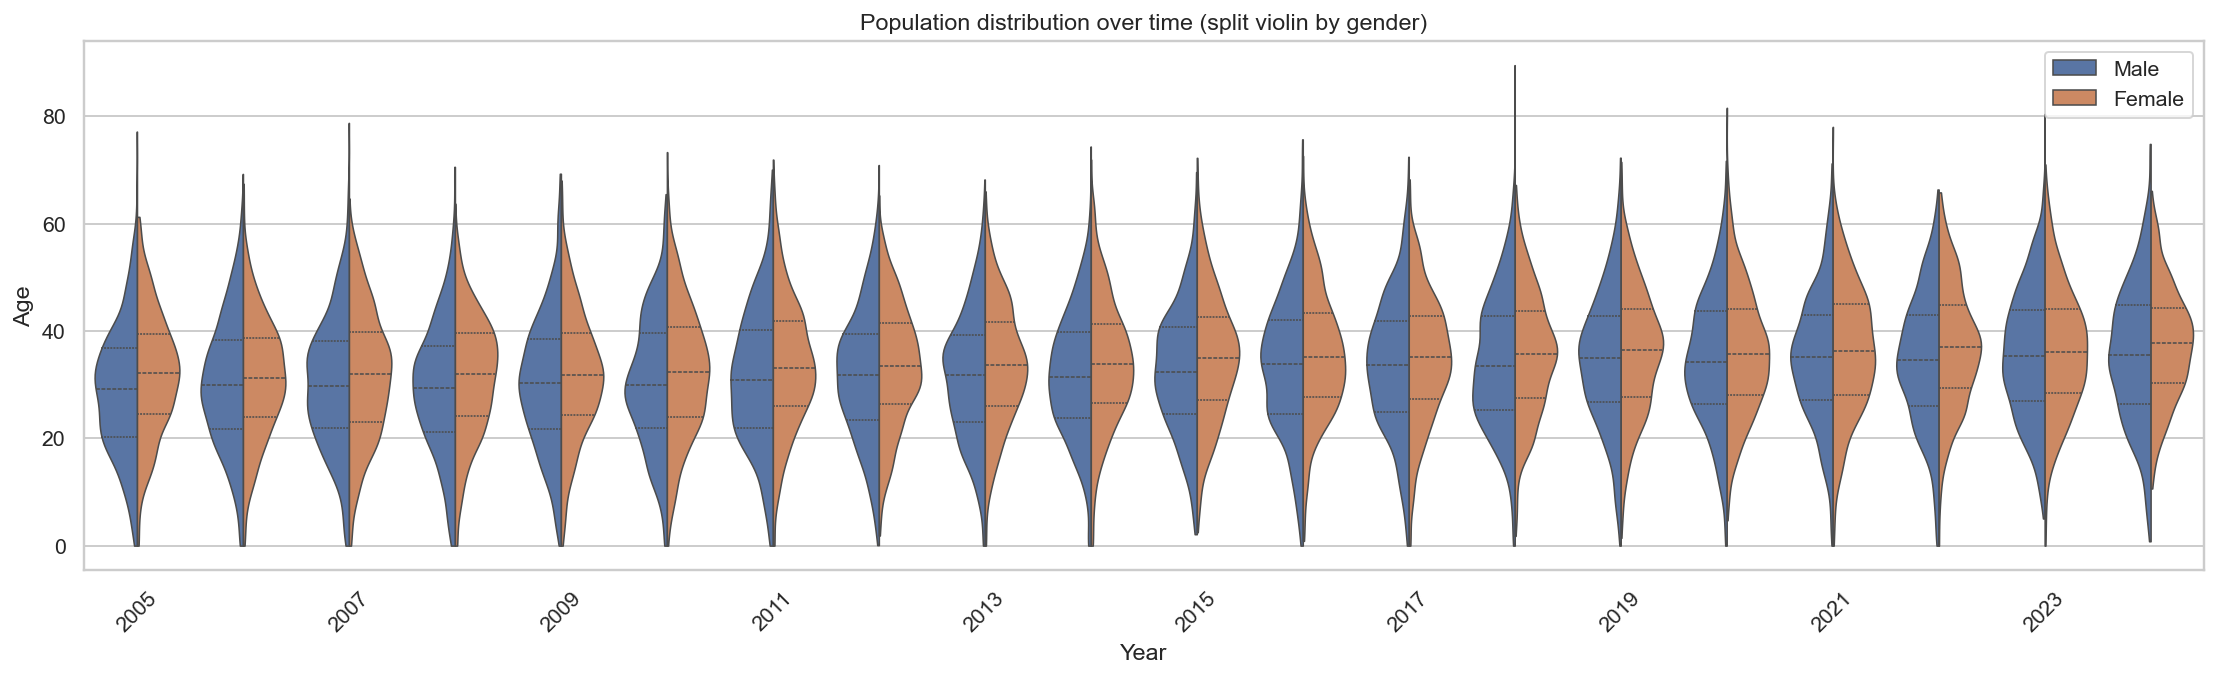

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------
# 1) Example data (replace with your real dataframe)
#    Required columns: year, gender, value (e.g., age)
# ----------------------------
np.random.seed(42)

years = list(range(2005, 2025))
n_per_year = 1200  # total people per year (demo)

rows = []
for y in years:
    mu = 30 + 0.35 * (y - years[0])  # drift older over time (demo)
    for gender, g_shift, g_sigma in [("Male", -1.0, 12.5), ("Female", +1.0, 11.5)]:
        n = n_per_year // 2
        ages = np.random.normal(loc=mu + g_shift, scale=g_sigma, size=n)
        ages = np.clip(ages, 0, 95)
        rows.extend([{"year": y, "gender": gender, "age": float(a)} for a in ages])

pop = pd.DataFrame(rows)

# If your "year" is numeric, seaborn violin works best if we treat it as ordered categorical
pop["year"] = pop["year"].astype(int).astype(str)

# Ensure hue has exactly two levels for split=True
pop["gender"] = pd.Categorical(pop["gender"], categories=["Male", "Female"], ordered=True)

# ----------------------------
# 2) Plot: split violin over time
# ----------------------------
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(16, 5), dpi=140)

sns.violinplot(
    data=pop,
    x="year",
    y="age",            # <-- replace "age" with your variable
    hue="gender",
    split=True,         # left/right halves
    inner="quartile",   # show quartiles inside
    cut=0,              # don't extend beyond min/max
    bw_adjust=0.9,      # smoothing (smaller -> more detail)
    linewidth=0.8,
    scale="width",      # equal max width per year (good for comparing shapes)
    ax=ax
)

ax.set_title("Population distribution over time (split violin by gender)")
ax.set_xlabel("Year")
ax.set_ylabel("Age")  # rename if using another variable

# Make the x-axis readable (show fewer ticks if many years)
step = 2  # show every 2nd year label
for i, tick in enumerate(ax.get_xticklabels()):
    tick.set_visible(i % step == 0)
ax.tick_params(axis="x", rotation=45)

ax.legend(title="", loc="upper right", frameon=True)
plt.tight_layout()
plt.show()

/var/folders/ss/l5wyf1v92rl0qj7z7zx8zzhw0000gn/T/ipykernel_80051/1075880450.py:76: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  area = np.trapz(dens, value_grid)


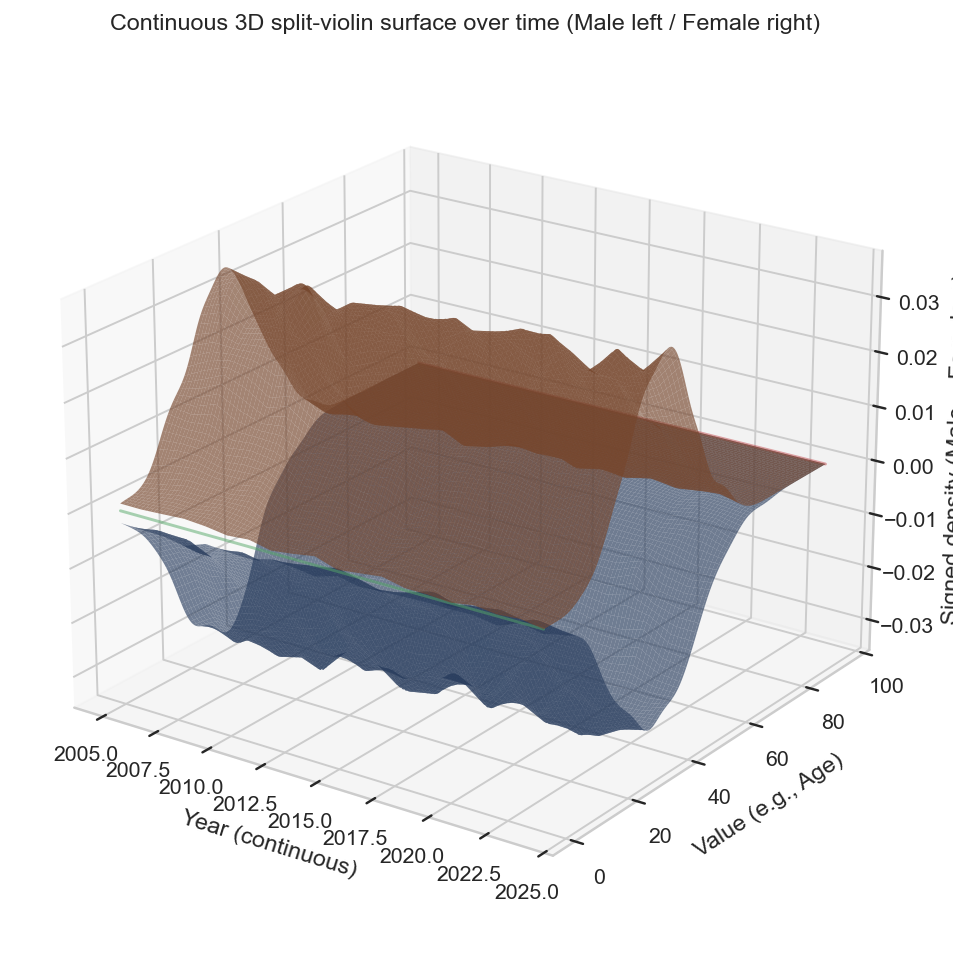

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 3D projection
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

# ----------------------------
# 1) Example data (replace with your real dataframe)
# Required columns: year (numeric), gender ("Male"/"Female"), value (e.g., age)
# ----------------------------
np.random.seed(42)

years = np.arange(2005, 2025)
n_per_year = 1200

rows = []
for y in years:
    mu = 30 + 0.35 * (y - years[0])
    for gender, g_shift, g_sigma in [("Male", -1.0, 12.5), ("Female", +1.0, 11.5)]:
        n = n_per_year // 2
        vals = np.random.normal(loc=mu + g_shift, scale=g_sigma, size=n)
        vals = np.clip(vals, 0, 95)
        rows.extend([{"year": float(y), "gender": gender, "value": float(v)} for v in vals])

df = pd.DataFrame(rows)

# If you have your own df already, ensure you have:
# df["year"] numeric (float/int), df["gender"] in {"Male","Female"}, df["value"] numeric

# ----------------------------
# 2) KDE helper (SciPy preferred; sklearn fallback)
# ----------------------------
def kde_1d(samples: np.ndarray, grid: np.ndarray, bw_adjust: float = 1.0) -> np.ndarray:
    samples = np.asarray(samples, dtype=float)
    samples = samples[np.isfinite(samples)]
    if len(samples) < 5:
        return np.zeros_like(grid)

    # Try SciPy first
    try:
        from scipy.stats import gaussian_kde
        kde = gaussian_kde(samples)
        # Adjust bandwidth (stable, simple)
        kde.set_bandwidth(bw_method=kde.factor * bw_adjust)
        dens = kde(grid)
        return dens
    except Exception:
        # Fallback: sklearn KernelDensity
        from sklearn.neighbors import KernelDensity
        # Heuristic bandwidth: std * n^{-1/5} (Silverman-ish)
        std = np.std(samples) if np.std(samples) > 1e-9 else 1.0
        bw = bw_adjust * std * (len(samples) ** (-1 / 5))
        bw = max(bw, 0.5)
        kde = KernelDensity(kernel="gaussian", bandwidth=bw).fit(samples.reshape(-1, 1))
        log_d = kde.score_samples(grid.reshape(-1, 1))
        return np.exp(log_d)

# ----------------------------
# 3) Build density matrices over (time, value)
# ----------------------------
VALUE_MIN, VALUE_MAX = 0, 95
value_grid = np.linspace(VALUE_MIN, VALUE_MAX, 220)

# Compute KDE on discrete years, then interpolate to a finer continuous time axis
years_sorted = np.sort(df["year"].unique())
time_fine = np.linspace(years_sorted.min(), years_sorted.max(), 240)  # smoother "continuous" surface

def density_matrix_for_gender(gender: str, bw_adjust: float = 0.9) -> np.ndarray:
    D = np.zeros((len(years_sorted), len(value_grid)))
    for i, y in enumerate(years_sorted):
        samples = df.loc[(df["year"] == y) & (df["gender"] == gender), "value"].values
        dens = kde_1d(samples, value_grid, bw_adjust=bw_adjust)

        # Normalize each slice to integrate to 1 (so widths are comparable over time)
        area = np.trapz(dens, value_grid)
        if area > 0:
            dens = dens / area

        D[i, :] = dens
    return D

D_male_years = density_matrix_for_gender("Male", bw_adjust=0.9)
D_female_years = density_matrix_for_gender("Female", bw_adjust=0.9)

# Interpolate along time to make it continuous
def interp_time(D_years: np.ndarray) -> np.ndarray:
    D_fine = np.zeros((len(time_fine), D_years.shape[1]))
    for j in range(D_years.shape[1]):
        D_fine[:, j] = np.interp(time_fine, years_sorted, D_years[:, j])
    return D_fine

D_male = interp_time(D_male_years)
D_female = interp_time(D_female_years)

# ----------------------------
# 4) Create 3D surfaces (split by gender)
# ----------------------------
# X: time, Y: value, Z: signed density (Male negative, Female positive)
X, Y = np.meshgrid(time_fine, value_grid, indexing="ij")

SCALE = 1.0  # increase if you want the "violin width" thicker
Z_male = -SCALE * D_male
Z_female = +SCALE * D_female

# ----------------------------
# 5) Plot
# ----------------------------
fig = plt.figure(figsize=(14, 7), dpi=140)
ax = fig.add_subplot(111, projection="3d")

# Surfaces (use alpha so both are visible)
surf1 = ax.plot_surface(X, Y, Z_male, rstride=2, cstride=2, linewidth=0, antialiased=True, alpha=0.65)
surf2 = ax.plot_surface(X, Y, Z_female, rstride=2, cstride=2, linewidth=0, antialiased=True, alpha=0.65)

# Center plane (optional visual anchor)
ax.plot([time_fine.min(), time_fine.max()], [VALUE_MIN, VALUE_MIN], [0, 0], alpha=0.5)
ax.plot([time_fine.min(), time_fine.max()], [VALUE_MAX, VALUE_MAX], [0, 0], alpha=0.5)

ax.set_title("Continuous 3D split-violin surface over time (Male left / Female right)")
ax.set_xlabel("Year (continuous)")
ax.set_ylabel("Value (e.g., Age)")
ax.set_zlabel("Signed density (Male -, Female +)")

# Viewing angle: tweak as you like
ax.view_init(elev=22, azim=-55)

plt.tight_layout()
plt.show()

In [32]:
import plotly.io as pio
from pathlib import Path

# 1) Downsample the surface grids before plotting (FAST + stable)
stride_t = 3   # increase to 4–6 if still heavy
stride_v = 2   # increase to 3–5 if still heavy

X_ds = X[::stride_t, ::stride_v]
Z_ds = Z[::stride_t, ::stride_v]
Y_male_ds = Y_male[::stride_t, ::stride_v]
Y_female_ds = Y_female[::stride_t, ::stride_v]

fig = go.Figure()

fig.add_trace(go.Surface(
    x=X_ds, y=Y_male_ds, z=Z_ds,
    opacity=0.70, showscale=False,
    name="Male"
))

fig.add_trace(go.Surface(
    x=X_ds, y=Y_female_ds, z=Z_ds,
    opacity=0.70, showscale=False,
    name="Female"
))

fig.update_layout(
    title="Continuous 3D split-violin surface (rotated: Y=density, Z=value)",
    scene=dict(
        xaxis_title="Year (continuous)",
        yaxis_title="Signed density (Male − / Female +)",
        zaxis_title="Value",
    ),
    margin=dict(l=0, r=0, t=50, b=0),
    scene_camera=dict(eye=dict(x=1.6, y=-1.8, z=0.9))
)

# 2) Write a self-contained HTML (NO internet/CDN needed)
out = Path("split_violin_3d.html").resolve()
pio.write_html(fig, file=str(out), auto_open=True, include_plotlyjs=True, full_html=True)
print("Wrote:", out)


Wrote: /Users/pstaif/Downloads/MyApps/econ_visual/split_violin_3d.html


/Users/pstaif/Downloads/MyApps/econ_visual/split_violin_3d.html

In [42]:
"""
Interactive 3D continuous split-violin surface (rotated 90 degrees)

Axes:
- X: time (continuous; year)
- Z: value axis (age)
- Y: signed density (Male negative, Female positive)

Input expected: CZSO population by age-group and sex over time
(e.g., "Obyvatelstvo podle pětiletých věkových skupin a pohlaví ...").
"""

from __future__ import annotations

import re
import csv
from pathlib import Path
from typing import Optional, Dict

import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio


# ----------------------------
# 0) User configuration (KEEPED EXACTLY)
# ----------------------------

CSV_PATH = r"data/OD_DEM02_vse_2025051510021868.CSV"
OUT_HTML = "czech_population_3d_violin.html"

YEAR_MIN = 1920
YEAR_MAX = None  # e.g., 2023

AGE_GRID_POINTS = 220
TIME_GRID_POINTS = 260

STRIDE_T = 3
STRIDE_A = 2

DENSITY_SCALE = 2.0
BW_ADJUST = 1.0


# ----------------------------
# 1) Robust CSV reading
# ----------------------------

def sniff_delimiter(path: str, sample_bytes: int = 8192) -> str:
    raw = Path(path).read_bytes()[:sample_bytes]
    try:
        dialect = csv.Sniffer().sniff(
            raw.decode("utf-8", errors="ignore"),
            delimiters=[",", ";", "\t", "|"],
        )
        return dialect.delimiter
    except Exception:
        return ","


def read_czso_csv(path: str) -> pd.DataFrame:
    delim = sniff_delimiter(path)

    for enc in ("utf-8", "utf-8-sig", "cp1250", "latin1"):
        try:
            df = pd.read_csv(
                path,
                sep=delim,
                quotechar='"',
                skipinitialspace=True,
                low_memory=False,
                encoding=enc,
            )
            if len(df.columns) >= 3:
                return df
        except Exception:
            continue

    return pd.read_csv(path, sep=delim, quotechar='"', skipinitialspace=True, low_memory=False)


# ----------------------------
# 2) Column inference (handles slight schema differences)
# ----------------------------

def pick_col(cols, candidates):
    cols_lower = {c.lower(): c for c in cols}
    for cand in candidates:
        if cand.lower() in cols_lower:
            return cols_lower[cand.lower()]
    return None


def infer_columns(df: pd.DataFrame) -> Dict[str, str]:
    cols = df.columns.tolist()

    col_year_like = pick_col(cols, ["casref_do", "casref", "time", "rok", "year", "datum"])
    col_age_like  = pick_col(cols, ["vek_txt", "vek", "age", "vek_skupina", "age_group"])
    col_sex_like  = pick_col(cols, ["pohlavi_txt", "pohlavi", "sex", "pohl", "gender"])
    col_geo_like  = pick_col(cols, ["vuzemi_txt", "uzemi_txt", "geo_txt", "uzemi", "geo", "location", "stat_txt", "stat"])
    col_value_like= pick_col(cols, ["hodnota", "value", "pocet", "stav", "population", "pop"])

    missing = [k for k, v in {
        "time":  col_year_like,
        "age":   col_age_like,
        "sex":   col_sex_like,
        "value": col_value_like
    }.items() if v is None]

    if missing:
        raise ValueError(
            f"Could not infer required columns: {missing}\n"
            f"Available columns:\n{cols}"
        )

    return {
        "time":  col_year_like,
        "age":   col_age_like,
        "sex":   col_sex_like,
        "geo":   col_geo_like,   # optional
        "value": col_value_like,
    }


# ----------------------------
# 3) Parsing helpers (PATCHED)
# ----------------------------

def to_year(series: pd.Series) -> pd.Series:
    s = series.astype(str).str.strip()
    year = s.str.extract(r"(\d{4})", expand=False)
    return pd.to_numeric(year, errors="coerce").astype("Int64")


def parse_age_mid(age_txt: str) -> Optional[float]:
    """
    Parse age group string into a numeric midpoint.
    Handles: "0-4", "5–9", "0 až 4", "95+", "100 a více", etc.
    """
    if age_txt is None:
        return None
    t = str(age_txt).strip().lower()

    if t in ("nezjištěno", "nezjisteno", "unknown", "celkem", "total", "x", ""):
        return None

    # Normalize dash characters
    t = t.replace("–", "-").replace("—", "-")

    # 95+ / 100+ variants
    m_plus = re.search(r"(\d+)\s*\+", t)
    if m_plus:
        a = int(m_plus.group(1))
        return float(a) + 2.0

    m_more = re.search(r"(\d+)\s*(a|and)\s*(vice|více|more)", t)
    if m_more:
        a = int(m_more.group(1))
        return float(a) + 2.0

    # Range "0-4"
    m_rng = re.search(r"(\d+)\s*-\s*(\d+)", t)
    if m_rng:
        a = int(m_rng.group(1))
        b = int(m_rng.group(2))
        return 0.5 * (a + b)

    # Range "0 až 4" / "0 az 4" / "0 to 4"
    m_az = re.search(r"(\d+)\s*(až|az|to)\s*(\d+)", t)
    if m_az:
        a = int(m_az.group(1))
        b = int(m_az.group(3))
        return 0.5 * (a + b)

    # Single age
    if re.fullmatch(r"\d+", t):
        return float(int(t))

    return None


def normalize_sex_label(x: str) -> Optional[str]:
    """
    Map CZ strings to {Male, Female}. Returns None for totals/unknowns.
    """
    if x is None:
        return None
    t = str(x).strip().lower()

    if t in ("celkem", "total", "t", "oba", "obě", "obě pohlaví", "obě pohlavi", "všichni", "vsichni", ""):
        return None

    if ("muž" in t) or ("muz" in t) or ("muži" in t) or ("muzi" in t) or (t in ("m", "male")):
        return "Male"
    if ("žen" in t) or ("zen" in t) or ("ženy" in t) or ("zeny" in t) or (t in ("f", "female")):
        return "Female"

    return None


# ----------------------------
# 4) Weighted Gaussian KDE (no SciPy needed)
# ----------------------------

def weighted_kde_1d(
    x_mid: np.ndarray,
    w: np.ndarray,
    grid: np.ndarray,
    bw_adjust: float = 1.0
) -> np.ndarray:
    x_mid = np.asarray(x_mid, dtype=float)
    w = np.asarray(w, dtype=float)
    grid = np.asarray(grid, dtype=float)

    m = np.isfinite(x_mid) & np.isfinite(w) & (w > 0)
    x_mid = x_mid[m]
    w = w[m]

    if x_mid.size == 0:
        return np.zeros_like(grid)

    wsum = w.sum()
    mean = (w * x_mid).sum() / wsum
    var = (w * (x_mid - mean) ** 2).sum() / wsum
    std = np.sqrt(max(var, 1e-9))

    neff = (wsum ** 2) / max((w ** 2).sum(), 1e-9)

    h = bw_adjust * 1.06 * std * (neff ** (-1 / 5))
    h = max(h, 0.75)

    diff = grid[:, None] - x_mid[None, :]
    kern = np.exp(-0.5 * (diff / h) ** 2) / (np.sqrt(2 * np.pi) * h)
    dens = (kern * w[None, :]).sum(axis=1) / wsum

    area = np.trapz(dens, grid)
    if area > 0:
        dens = dens / area

    return dens


# ----------------------------
# 5) Build density surfaces and Plotly figure (PATCHED GEO FILTER)
# ----------------------------

def build_3d_violin(df: pd.DataFrame) -> go.Figure:
    cols = infer_columns(df)

    df = df.copy()
    df["year"] = to_year(df[cols["time"]])
    df["sex_norm"] = df[cols["sex"]].apply(normalize_sex_label)
    df["age_mid"] = df[cols["age"]].apply(parse_age_mid)
    df["pop"] = pd.to_numeric(df[cols["value"]], errors="coerce")

    # Filter usable rows
    df = df[df["year"].notna() & df["sex_norm"].notna() & df["age_mid"].notna() & df["pop"].notna()]
    df["year"] = df["year"].astype(int)

    if YEAR_MIN is not None:
        df = df[df["year"] >= int(YEAR_MIN)]
    if YEAR_MAX is not None:
        df = df[df["year"] <= int(YEAR_MAX)]

    # Safer national filter: try, but never allow it to empty df
    if cols["geo"] is not None:
        geo = df[cols["geo"]].astype(str)

        candidates = [
            "Česká republika", "Ceska republika",
            "Česko", "Cesko",
            "ČR", "CR",
            "Czechia", "Czech Republic",
        ]

        mask_candidates = geo.isin(candidates)
        mask_rep = geo.str.contains("republik", case=False, na=False)
        mask_cz = geo.str.contains(r"\bcz\b|čes|ces", case=False, na=False)

        df_before = df
        if mask_candidates.any():
            df = df[mask_candidates]
        else:
            df_try = df[mask_rep | mask_cz]
            if not df_try.empty:
                df = df_try
            else:
                df = df_before
                print(
                    "Note: national geo filter produced 0 rows; using ALL geographies instead.\n"
                    "Sample geo labels:",
                    list(pd.Series(geo.unique()).dropna()[:15])
                )

    if df.empty:
        raise ValueError(
            "After filtering, no rows remain. "
            "This usually means 'sex', 'age', or 'value' parsing failed. "
            "Try printing df.head() and df.dtypes after read_czso_csv()."
        )

    agg = (
        df.groupby(["year", "sex_norm", "age_mid"], as_index=False)["pop"]
          .sum()
          .sort_values(["year", "sex_norm", "age_mid"])
    )

    age_min = float(max(0.0, agg["age_mid"].min() - 5))
    age_max = float(min(105.0, agg["age_mid"].max() + 5))
    age_grid = np.linspace(age_min, age_max, AGE_GRID_POINTS)

    years_sorted = np.sort(agg["year"].unique())
    time_fine = np.linspace(years_sorted.min(), years_sorted.max(), TIME_GRID_POINTS)

    def density_matrix_for_sex(sex: str) -> np.ndarray:
        D_years = np.zeros((len(years_sorted), len(age_grid)), dtype=float)

        for i, y in enumerate(years_sorted):
            sub = agg[(agg["year"] == y) & (agg["sex_norm"] == sex)]
            dens = weighted_kde_1d(
                sub["age_mid"].to_numpy(),
                sub["pop"].to_numpy(),
                age_grid,
                bw_adjust=BW_ADJUST,
            )
            D_years[i, :] = dens

        D_fine = np.zeros((len(time_fine), len(age_grid)), dtype=float)
        for j in range(len(age_grid)):
            D_fine[:, j] = np.interp(time_fine, years_sorted, D_years[:, j])
        return D_fine

    D_male = density_matrix_for_sex("Male")
    D_female = density_matrix_for_sex("Female")

    # Rotate 90°: X=time, Z=age, Y=signed density
    X = np.repeat(time_fine[:, None], len(age_grid), axis=1)
    Z = np.repeat(age_grid[None, :], len(time_fine), axis=0)
    Y_male = -DENSITY_SCALE * D_male
    Y_female = +DENSITY_SCALE * D_female

    # Downsample for browser performance
    Xd = X[::STRIDE_T, ::STRIDE_A]
    Zd = Z[::STRIDE_T, ::STRIDE_A]
    Ym = Y_male[::STRIDE_T, ::STRIDE_A]
    Yf = Y_female[::STRIDE_T, ::STRIDE_A]

    fig = go.Figure()

    fig.add_trace(go.Surface(
        x=Xd, y=Ym, z=Zd,
        opacity=0.75,
        showscale=False,
        name="Male",
        hovertemplate="Year=%{x:.1f}<br>Age=%{z:.2f}<br>Signed density=%{y:.6f}<extra>Male</extra>",
    ))

    fig.add_trace(go.Surface(
        x=Xd, y=Yf, z=Zd,
        opacity=0.75,
        showscale=False,
        name="Female",
        hovertemplate="Year=%{x:.1f}<br>Age=%{z:.2f}<br>Signed density=%{y:.6f}<extra>Female</extra>",
    ))

    fig.add_trace(go.Scatter3d(
        x=np.concatenate([time_fine, time_fine]),
        y=np.zeros(2 * len(time_fine)),
        z=np.concatenate([np.full_like(time_fine, age_min), np.full_like(time_fine, age_max)]),
        mode="lines",
        line=dict(width=3),
        name="Center (y=0)",
        hoverinfo="skip",
        opacity=0.35,
    ))

    fig.update_layout(
        title="Czech Republic population age distribution over time (3D split-violin surface)",
        scene=dict(
            xaxis_title="Year (continuous)",
            yaxis_title="Signed density (Male − / Female +)",
            zaxis_title="Age",
        ),
        margin=dict(l=0, r=0, t=50, b=0),
        scene_camera=dict(eye=dict(x=1.6, y=-1.8, z=0.9)),
        legend=dict(x=0.02, y=0.98),
    )

    return fig


# ----------------------------
# 6) Notebook execution cell
# ----------------------------

df = read_czso_csv(CSV_PATH)
fig = build_3d_violin(df)

# Best-effort inline display; always write HTML regardless.
try:
    fig.show()
except Exception as e:
    print("Inline fig.show() failed (OK). Reason:", repr(e))

out = Path(OUT_HTML).resolve()
pio.write_html(fig, file=str(out), auto_open=False, include_plotlyjs=True, full_html=True)
print(f"Saved interactive HTML to: {out}")

# Clickable link in notebooks (optional)
try:
    from IPython.display import HTML, display
    display(HTML(f'<a href="{out.as_posix()}" target="_blank">Open {OUT_HTML}</a>'))
except Exception:
    pass

Inline fig.show() failed (OK). Reason: ValueError('Mime type rendering requires nbformat>=4.2.0 but it is not installed')
Saved interactive HTML to: /Users/pstaif/Downloads/MyApps/econ_visual/czech_population_3d_violin.html


/var/folders/ss/l5wyf1v92rl0qj7z7zx8zzhw0000gn/T/ipykernel_80051/1155824459.py:237: DeprecationWarning:

`trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.

